<a href="https://colab.research.google.com/github/AdrianGuel/PhDThesis/blob/main/Chapter2/eulermaruyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

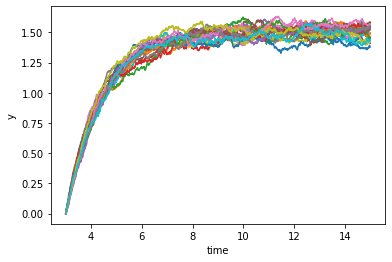

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Model:
    #parameters
    THETA = 0.7
    MU    = 1.5
    SIGMA = 0.06

def mu(y: float, _t: float) -> float:
    #drift model
    return Model.THETA * (Model.MU - y)

def sigma(_y: float, _t: float) -> float:
    #sigma model
    return Model.SIGMA

def dW(delta_t: float) -> float:
    #execution of randn
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def run_simulation():
    #simulation
    tau_0 = 3
    T  = 15
    N      = 1000  # Compute 1000 grid points
    DT     = float(T - tau_0) / N
    TS = np.arange(tau_0, T + DT, DT)

    Y_0 = 0

    Y = np.zeros(N + 1)
    Y[0] = Y_0
    for i in range(1, TS.size):
        t = tau_0 + (i - 1) * DT
        y = Y[i - 1]
        Y[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)

    return TS, Y

def plot_simulations(num_sims: int) -> None:
    for _ in range(num_sims):
        plt.plot(*run_simulation())

    plt.xlabel("time")
    plt.ylabel("y")
    plt.show()

if __name__=="__main__":
    NUM_SIMS = 20
    plot_simulations(NUM_SIMS)